In [19]:
import soundfile # to read audio file
import numpy as np
import librosa # to extract speech features
import glob
import os
import pickle # to save model after training
from sklearn.model_selection import train_test_split # for splitting training and testing
from sklearn.neural_network import MLPClassifier # multi-layer perceptron model
from sklearn.metrics import accuracy_score # to measure how good we are

In [20]:
def extract_feature(file_name, **kwargs):
    """
    Extract feature from audio file `file_name`
        Features supported:
            - MFCC (mfcc)
            - Chroma (chroma)
            - MEL Spectrogram Frequency (mel)
            - Contrast (contrast)
            - Tonnetz (tonnetz)
        e.g:
        `features = extract_feature(path, mel=True, mfcc=True)`
    """
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma or contrast:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
        if contrast:
            contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, contrast))
        if tonnetz:
            tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
            result = np.hstack((result, tonnetz))
    return result

In [21]:
# all emotions on RAVDESS dataset
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# we allow only these emotions ( feel free to tune this on your need )
AVAILABLE_EMOTIONS = {
    "angry",
    "sad",
    "neutral",
    "happy"
}

def load_data(test_size=0.1):
    X, y = [], []
    for file in glob.glob("data/Actor_*/*.wav"):
        # get the base name of the audio file
        basename = os.path.basename(file)
        # get the emotion label
        emotion = int2emotion[basename.split("-")[2]]
        # we allow only AVAILABLE_EMOTIONS we set
        if emotion not in AVAILABLE_EMOTIONS:
            continue
        # extract speech features
        features = extract_feature(file, mfcc=True, chroma=True, mel=True)
        # add to data
        X.append(features)
        y.append(emotion)
    # split the data to training and testing and return it
    return train_test_split(np.array(X), y, test_size=test_size, random_state=7)

In [22]:
X_train, X_test, y_train, y_test = load_data(test_size=0.1)

/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.

/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -6.1035156e-05 ... -3.0517578e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
  2.1362305e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 6.1035156e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as po

/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[-0.00283813 -0.00286865 -0.00286865 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments w

/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  2.7465820e-04 ...  6.1035156e-05
  9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  3.0517578e-05 ...  3.9672852e-04
  4.5776367e-04 -2.7465820e-04] as keyword args. From version 0.10 passing these

/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 9.1552734e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arg

/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[ 6.1035156e-05  3.0517578e-05  6.1035156e-05 ... -9.1552734e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as po

/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[1.5258789e-04 1.5258789e-04 9.1552734e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[-1.5258789e-04 -1.5258789e-04 -1.5258789e-04 ...  9.1552734e-05
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as po

/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.5258789e-04
 -1.5258789e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these

/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  0.0000000e+00 ... -2.7465820e-04
 -3.0517578e-04 -2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[ 9.1552734e-05  1.2207031e-04  1.2207031e-04 ... -3.0517578e-05
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05  3.0517578e-05  3.0517578e-05 ...  6.1035156e-05
 -3.0517578e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these

/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[ 9.1552734e-05 -3.0517578e-05 -4.8828125e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00015259 0.00015259 0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
 -3.0517578e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments 

/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00231934 0.00238037 0.00234985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ... -2.7465820e-04
 -2.1362305e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will r

In [23]:
# print some details
# number of samples in training data
print("[+] Number of training samples:", X_train.shape[0])
# number of samples in testing data
print("[+] Number of testing samples:", X_test.shape[0])
# number of features used
# this is a vector of features extracted 
# using extract_features() function
print("[+] Number of features:", X_train.shape[1])

[+] Number of training samples: 604
[+] Number of testing samples: 68
[+] Number of features: 180


In [24]:
# best model, determined by a grid search
model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

In [25]:
# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
model = MLPClassifier(**model_params)

In [26]:
# train the model
print("[*] Training the model...")
model.fit(X_train, y_train)

[*] Training the model...


MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [27]:
# predict 25% of data to measure how good we are
y_pred = model.predict(X_test)

# calculate the accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))


Accuracy: 77.94%


In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

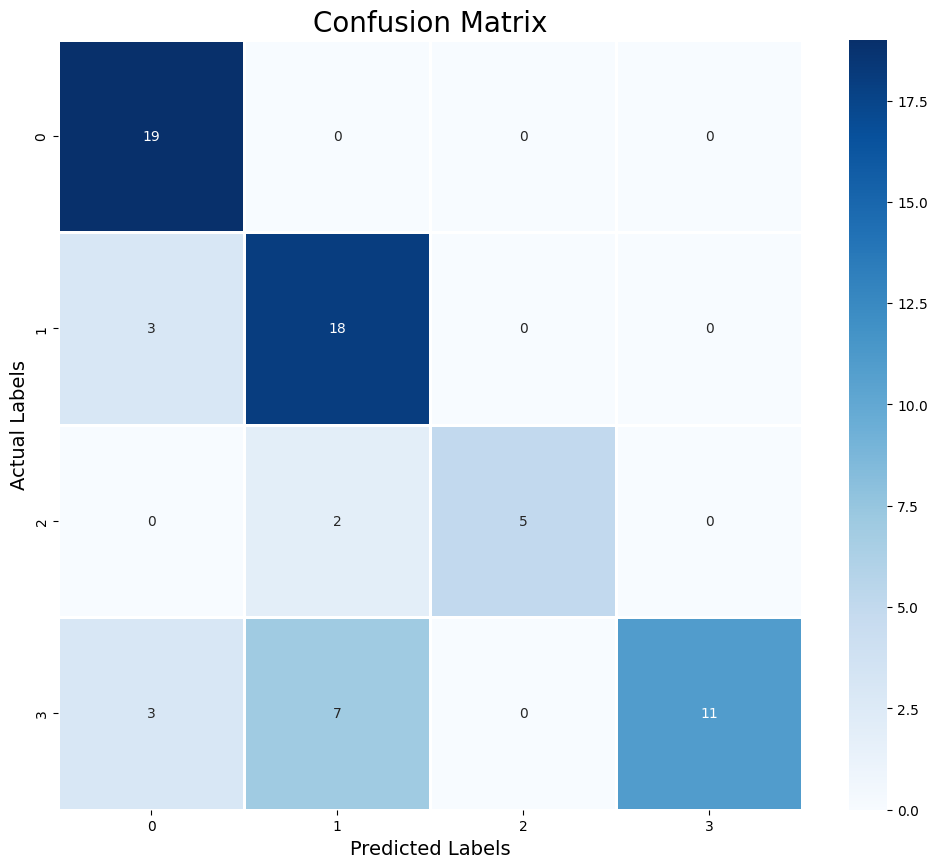

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))

sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.76      1.00      0.86        19
       happy       0.67      0.86      0.75        21
     neutral       1.00      0.71      0.83         7
         sad       1.00      0.52      0.69        21

    accuracy                           0.78        68
   macro avg       0.86      0.77      0.78        68
weighted avg       0.83      0.78      0.77        68



In [31]:
import os
# now we save the model
# make result directory if doesn't exist yet
if not os.path.isdir("result"):
    os.mkdir("result")

pickle.dump(model, open("result/mlp_classifier.model", "wb"))

In [35]:
# import required libraries
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv

# Sampling frequency
frequency = 44400

# Recording duration in seconds
duration = 10

# to record audio from
# sound-device into a Numpy

def record_to_file(path):
    "Records from the microphone and outputs the resulting data to 'path'"
    recording = sd.rec(int(duration * frequency),
                    samplerate = frequency, channels = 1)

    # Wait for the audio to complete
    sd.wait()

    # using scipy to save the recording in .wav format
    # This will convert the NumPy array
    # to an audio file with the given sampling frequency
    write("recording0.wav", frequency, recording)

    # using wavio to save the recording in .wav format
    # This will convert the NumPy array to an audio
    # file with the given sampling frequency
    wv.write("recording1.wav", recording, frequency, sampwidth=2)

In [36]:
import pickle
if __name__ == "__main__":
    # load the saved model (after training)
    model = pickle.load(open("result/mlp_classifier.model", "rb"))
    print("Please talk")
    filename = "recording1.wav"
    # record the file (start talking)
    record_to_file(filename)
    # extract features and reshape it
    features = extract_feature(filename, mfcc=True, chroma=True, mel=True).reshape(1, -1)
    # predict
    result = model.predict(features)[0]
    # show the result !
    print("result:", result)

Please talk
result: angry


/var/folders/80/lmsw7srj14x9wg66jf_1j7hm0000gn/T/ipykernel_45621/1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  9.1552734e-05 ... -3.9672852e-04
 -4.2724609e-04 -3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
